In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\mash\AppData\Local\Temp\ipykernel_10104\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv("amazon.csv",encoding='iso-8859-1',parse_dates=['date'])

In [3]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

**Displaying top 5 rows**

In [5]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**last 5 cells**

In [6]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


**dataset shape**

In [7]:
print('Number of rows',data.shape[0])
print('Number of columns',data.shape[1])

Number of rows 6454
Number of columns 5


**data information**

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


**checking for duplicates**

In [9]:
dup_data=data.duplicated().any()

In [10]:
dup_data

True

**droping duplicates**

In [11]:
data=data.drop_duplicates()

In [12]:
data.shape

(6422, 5)

**Checking for null values**

In [13]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

**overall stats**

In [14]:
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [15]:
month_map = {
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}

# Apply mapping to rename Portuguese month names to English in the 'Months' column of the existing DataFrame 'data'
data['month'] = data['month'].map(month_map)


C:\Users\mash\AppData\Local\Temp\ipykernel_10104\557284415.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['month'].map(month_map)


In [16]:
data

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


**Month with maximum forest fires**

In [17]:
data1=data.groupby('month')['number'].sum().reset_index()

In [18]:
data1

,month,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


**diagaram representation**

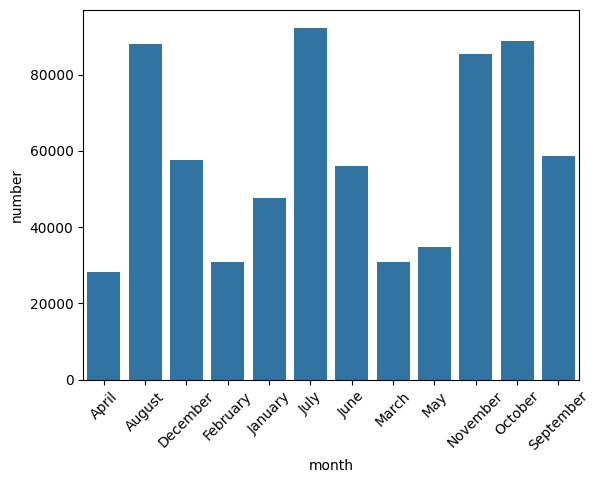

In [19]:
sns.barplot(x='month',y='number',data=data1)
# Tilt the x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

**state with maximum number of forest fires**

In [33]:
data2=data.groupby('state')['number'].sum().reset_index()
data2.sort_values(by='number', ascending=False)


,state,number
10,Mato Grosso,96246.028
12,Paraiba,52426.918
20,Sao Paulo,51121.198
16,Rio,45094.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


In [21]:
data2

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


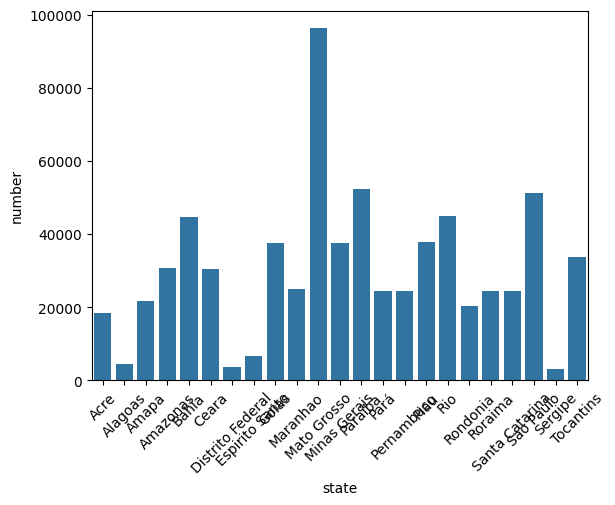

<Figure size 8000x1000 with 0 Axes>

In [22]:
sns.barplot(x='state',y='number',data=data2)
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.figure(figsize=(80, 10))  # Adjust width and height as needed


# Show plot
plt.show()

**Total number of fires recorded in Amazonas**

In [23]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

**Number of forest fires  recorded year wise in the Amazonas state**

In [24]:
data4=data[data['state']=='Amazonas']

In [25]:
data4

,year,state,month,number,date
718,1998,Amazonas,January,0.0,1998-01-01
719,1999,Amazonas,January,3.0,1999-01-01
720,2000,Amazonas,January,7.0,2000-01-01
721,2001,Amazonas,January,3.0,2001-01-01
722,2002,Amazonas,January,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,December,80.0,2012-01-01
953,2013,Amazonas,December,236.0,2013-01-01
954,2014,Amazonas,December,293.0,2014-01-01
955,2015,Amazonas,December,565.0,2015-01-01


In [26]:
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


**Visualising on a barplot**

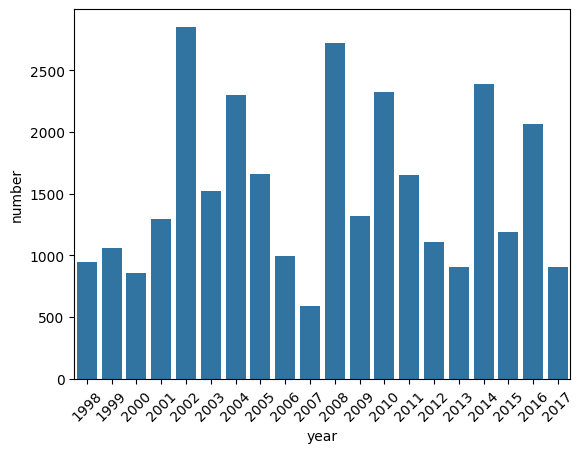

<Figure size 8000x1000 with 0 Axes>

In [27]:
sns.barplot(x='year',y='number',data=data5)
plt.xticks(rotation=45)
plt.figure(figsize=(80, 10))  # Adjust width and height as needed


# Show plot
plt.show()

**Number of forest fires daywise**

In [28]:
data6=data[data['state']=='Amazonas'].reset_index()

In [29]:
data6

,index,year,state,month,number,date
0,718,1998,Amazonas,January,0.0,1998-01-01
1,719,1999,Amazonas,January,3.0,1999-01-01
2,720,2000,Amazonas,January,7.0,2000-01-01
3,721,2001,Amazonas,January,3.0,2001-01-01
4,722,2002,Amazonas,January,17.0,2002-01-01
...,...,...,...,...,...,...
234,952,2012,Amazonas,December,80.0,2012-01-01
235,953,2013,Amazonas,December,236.0,2013-01-01
236,954,2014,Amazonas,December,293.0,2014-01-01
237,955,2015,Amazonas,December,565.0,2015-01-01


In [30]:
day=data6.groupby(['date'].dt.dayofweek).sum().number
import calendar
day.index={calendar.day_name[x] for x in range (0,7)}
day.reset_index()

AttributeError: 'list' object has no attribute 'dt'

In [ ]:
import calendar

# Assuming 'date' column is not of datetime type, convert it first
data6['date'] = pd.to_datetime(data6['date'])

# Group by day of the week and sum the 'number' column
day = data6.groupby(data6['date'].dt.dayofweek)['number'].sum()

# Assign day names to the index
day.index = [calendar.day_name[x] for x in range(7)]

# Reset index to make day names a separate column
day = day.reset_index(name='total_number')

# Print the result
print(day)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='index', y='total_number', data=day)

# Set the figure size
plt.figure(figsize=(16, 5))

# Show the plot
plt.show()


**total number of forest fires in 2015 and visualize monthly**

In [ ]:
fire=data[data['year']==2015].reset_index()
fire1=fire.groupby('year')['number']
fire1